In [1]:
import numpy as np
import matplotlib.pyplot as plt

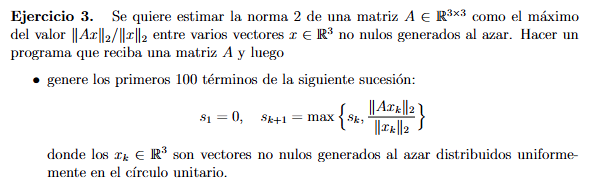  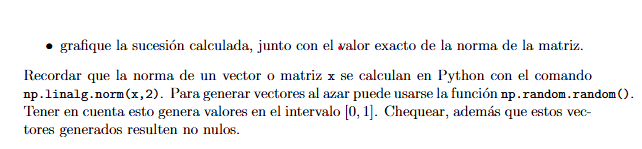

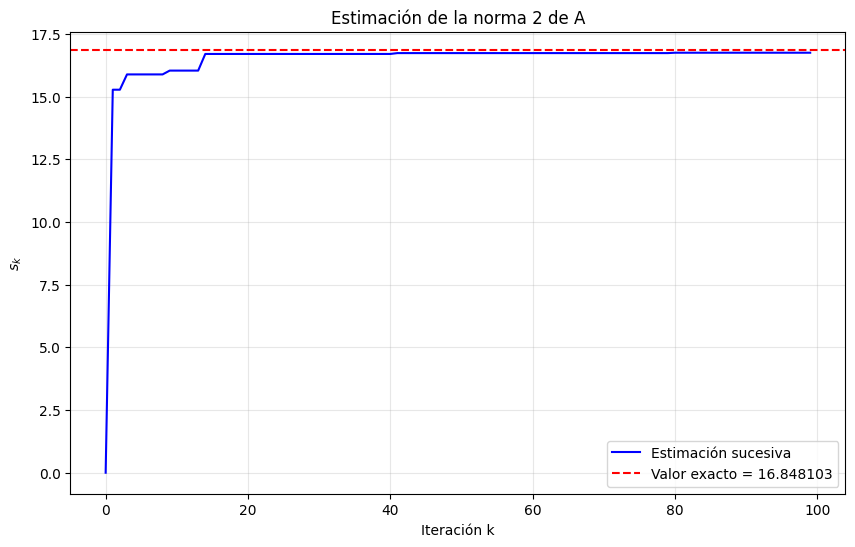

In [314]:
def estimar_norma2(A, k):
    s=[]
    s.append(0)
    for i in range(k):
        x_k =  np.random.random(3)
        sk_1 = max( s[i] ,np.linalg.norm(np.dot(A, x_k), 2) / np.linalg.norm(x_k,2))
        s.append(float(sk_1)) 
    return s

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=float)

k = 99
sucesion  = estimar_norma2(A, k)
valor_exacto =  np.linalg.norm(A,2)
valores_x = np.arange(k+1)


plt.figure(figsize=(10, 6))
plt.plot(valores_x, sucesion, 'b-', label='Estimación sucesiva')
plt.axhline(y=valor_exacto, color='r', linestyle='--', label=f'Valor exacto = {valor_exacto:.6f}')
plt.xlabel('Iteración k')
plt.ylabel('$s_k$')
plt.title('Estimación de la norma 2 de A')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

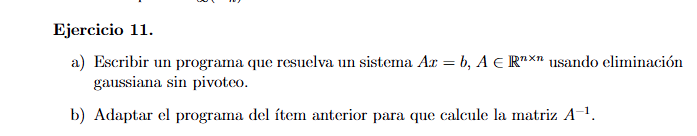

In [337]:
def eliminacion_gaussiana(A, b):
    A = A.astype(float)
    b = b.astype(float)
    n = len(A)
    Ab = np.hstack([A, b.reshape(-1, 1)])  # Matriz aumentada [A|b]
    
    # ELIMINACIÓN HACIA ADELANTE
    for i in range(n):
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] = Ab[j, i:] - factor * Ab[i, i:]
    
    # SUSTITUCIÓN HACIA ATRÁS  
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    
    return x

A = np.array([[5, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])
b = np.array([8, -11, -3])

x = eliminacion_gaussiana(A, b)
x

array([ 0.15384615,  3.92307692, -3.30769231])